# Lab Activity 5.1. Least Squares solution for a simple 2d regression problem  

In this activity, you will see how we can implement the least squares and apply it on synthetic data. The benefit is that we will see how the different coefficients used to create the data will surface as the weights of the least squares. In addition we will see how the noise will affect the exactness of the final solution that the least squares can produce.

**Learning Outcomes**

1. Implement a least squares solution using numpy only
2. Apply the implemented solution on a synthetic data and examine the resultant weights


In [1]:
import numpy as np
from numpy.linalg import inv  # NumPy Linear algebra library
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# generate the data
def get_t( X, w_):
    w_ = np.array(w_)
    return  w_.dot(X)
    
def getData(w_, noise=0, n = 1000 ):
    x1 = np.linspace(-10, 10, num = n)           # sampling uniformly from the x axis
    x2 = np.random.normal(x1,5)                  # same but some noise to avoid matrix X^-1 singularity
    X  = np.array([np.ones(len(x1)), x1, x2])    # design matrix here it is a transpose of what we have studied because it makes implementaiton slightly less cluttered
    t  = get_t(X, w_)                            # get the target value
    t  = np.random.normal(t,noise)               # add noise to the target to see the effect on the MSE
    return X,t



We will solve for both cases (with and without basis)

## Generate the data first

In [3]:
w_    = [10, 2, 5]  # original linear model weights to generate the data from and to compare later with w
noise = 5
X,t   = getData(w_, noise=noise, n=9) # try with and without noise and with and without basis


In [4]:
#X1,t1 = X,t  #store
#X,t = X1,t1  #retrieve

## Least Squares Solution

In [4]:
def getLS(X,t):                       # Least Squares Solution!
    Xt = X.dot(t)
    XX = inv(X.dot(X.T))
        
    XX = np.round(XX,4)
    Xt = np.round(Xt,2)
    
    w  = XX.dot(Xt)
    w  = np.round(w,2)
    
    #print(XX*100)
    #print(Xt)
    #print(w)
    
    return w

## Now apply the Least Squares on the Generated Dataset

Now let us try it ......................!

In [5]:
def applyLST(X,t):    
    w   = getLS(X,t)                            # solve using least squares
    y   = get_t(X, w)                           # predict using the solution
   
    RMSE = np.sqrt(((t - y)**2).sum()/len(t))   # get the Sqrt(Mean Sum of Squared Error)
    return y, w, RMSE

y, w, RMSE = applyLST(X,t)


Now compare between the fitted model weights and the original weights used to create the dataset (remember we added noise so there is no prefect solution)

In [6]:
print(w)
print(w_)
print('RMSE',np.round(RMSE,2))
print(noise)                                # note how close RMSE is to the noise (when data is enough and for reasonable noise values < 100)
                                            # there is a reason for this, see the last lesson in the unit

[10.01  1.41  5.23]
[10, 2, 5]
RMSE 4.06
5


Note that the interpretation of the above results depends on the printed outputs: the weights (`w`), the root mean squared error (`RMSE`), and the noise (`noise`). As a remaider, here's a detailed breakdown of the key components of the code:

**1. Weights (`w`).** This represents the estimated weights or coefficients for the regression model, calculated using the least squares method. These weights represent the contribution of each feature in $X$ to predicting the target $t$. If the data was generated with known true weights (`w_`), you can compare `w` and `w_`. **Close match** indicates the least squares method successfully captured the true relationship between the features and the target. But **Large difference** could be due to high noise, insufficient data, or poor feature representation.
        
**2. Root Mean Squared Error (`RMSE`).** The average error between the predicted values ($y$) and the true target values ($t$). The formula used is:
  $$
  RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^N (t_i - y_i)^2}
  $$
- **Interpretation**:
    - **Low RMSE**: Indicates the model is accurately predicting the target values, and the error is mainly due to noise.
    - **RMSE ≈ Noise**: If the RMSE value is close to the level of noise added to the data during its generation, this confirms the least squares method has effectively captured the true underlying relationship. The remaining error is purely due to noise.
    - **High RMSE**: Suggests the model struggled to fit the data. This could result from high noise, non-linearity in the data (not suited for least squares), or insufficient data.

**3. Noise.** The level of random variation added to the target values during data generation. The noise reflects the level of distortion or randomness in the data. Comparing `RMSE` with `noise` gives insight into model performance:  
- **RMSE ≈ Noise**: The model has successfully modeled the signal, and the remaining error is attributed to noise.
- **RMSE > Noise**: Indicates the model is underperforming, possibly due to insufficient data, overfitting, or an inadequate model structure.

In general, the results from the code should validate the ability of the least squares method to recover the true underlying relationship between $X$ and $t$, provided the data is sufficient and noise is reasonable. Comparing `w`, `w_`, RMSE, and `noise` helps to evaluate the effectiveness of the model and understand the impact of noise on the prediction accuracy. So analyse the results to get the right isnight from the results. 

## Visualize 
Both attributes x1 and x2 in 2d, we may want to create a better visualization by plotting in 3d (x1, x2, y)

Below we can realise that although Least squares is an exact solution (for the given data), the two lines may differ due to the added noise and not due to approximation.

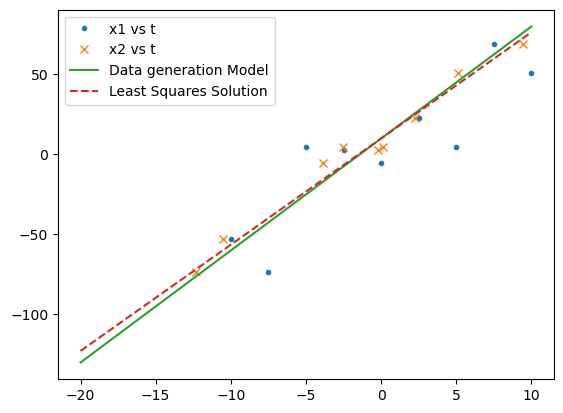

In [7]:
plt.plot(X[1],t,'.', label='x1 vs t')
plt.plot(X[2],t,'x', label='x2 vs t')
x1 = np.linspace(-20, 10, num = 9)
X1 = np.array([np.ones(len(x1)), x1, x1])
plt.plot(x1, get_t( X1, w_),'-' , label='Data generation Model')
plt.plot(x1, get_t( X1, w ),'--', label='Least Squares Solution')
plt.legend()


Create a data frame and store the dataset in a csv file

In [8]:
data = np.vstack((X,t,y)).T
df = pd.DataFrame(np.round(data,2), columns=['x0','x1','x2', 't', 'y'])
df.to_csv('simpleData.csv')
print(df)# [50:55])

    x0    x1     x2      t      y
0  1.0 -10.0 -10.55 -52.99 -59.28
1  1.0  -7.5 -12.30 -73.37 -64.88
2  1.0  -5.0   0.11   4.43   3.52
3  1.0  -2.5  -0.21   3.05   5.41
4  1.0   0.0  -3.84  -5.34 -10.08
5  1.0   2.5   2.22  22.60  25.16
6  1.0   5.0  -2.52   4.41   3.87
7  1.0   7.5   9.43  69.06  69.88
8  1.0  10.0   5.10  50.69  50.76
